# Presentation IMA205 Project Cardiac Disease Classification
This notebook presents the work done in an easy and clear way. The idea is that every step developed of the full stack can be presented and explained here.

In [9]:
# Importing the classes
from densenet.densenet import DenseNet
from roi import ROI
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from densnet_trainer import DenseNetTrainer

In [10]:
# Load the Model
densenet = DenseNet()
densenet.to("cuda")
# Load the model weights
densenet.load_state_dict(torch.load('/home/onyxia/work/project/CardiacPathologyPrediction/model_weights_best_dice_val0.7682003378868103.pth'))

<All keys matched successfully>

In [8]:
path_to_images = "./data/Train"
trainer = DenseNetTrainer(path_to_images, epochs=200, alpha=0.2, train_fraction=0.8, check_val_every=10)

for images in trainer.train_loader:
    image = images[0][0].unsqueeze(0).permute(3, 0, 1, 2).to(torch.float32)
    image.to("cuda")
    y_pred = densenet(image)
    # print(y_pred.size())
    plt.imshow(image[0][0], cmap='grey')
    plt.show()
    # y_true_diastole = F.one_hot((images[0][1]*3).to(torch.int64), num_classes=4).permute(2,3,0,1).to(torch.float32)
    # plt.imshow(y_true_diastole[0][0], cmap='grey')
    plt.imshow(y_pred.detach().numpy()[0][1], cmap='grey')
    # plt.show()
    break
    # plt.imshow(y_true_diastole[0][1].cpu(), cmap='grey')
    # plt.show()

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

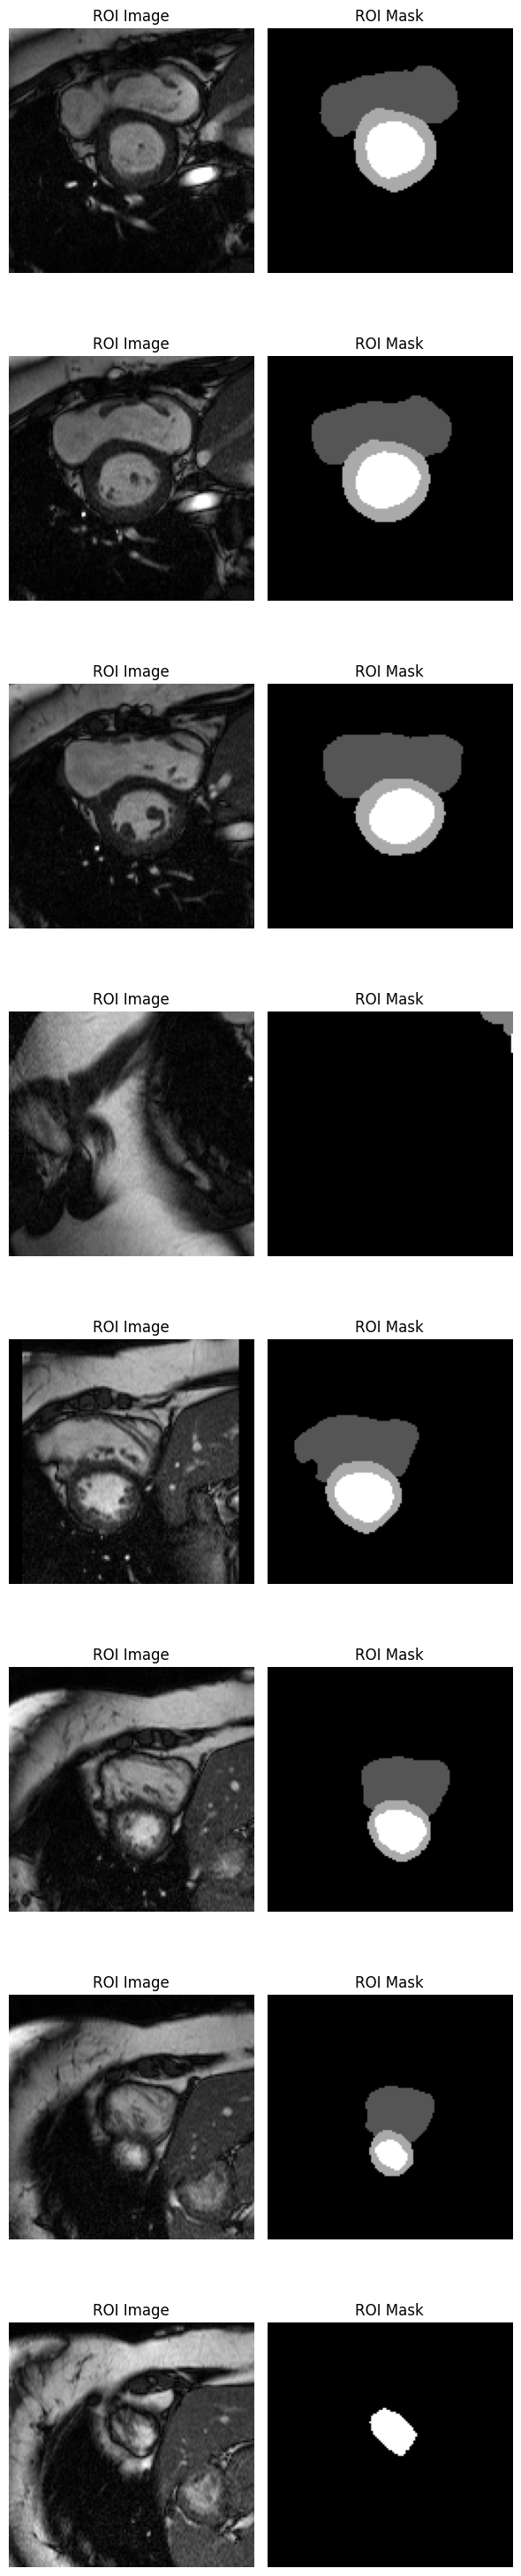

In [3]:
# plot the ROI images
# Load the dataset
roi_extractor = ROI('data/Train')
roi_image, roi_mask = roi_extractor.get_roi(0)

# Create a figure for everty slize in the image
fig, axs = plt.subplots(roi_image.shape[0], 2, figsize=(6, 30))
# Display the image and mask
for index in range(roi_image.shape[0]):
    axs[index, 0].imshow(roi_image[index], cmap='gray')
    axs[index, 1].imshow(roi_mask[index], cmap='gray')
    axs[index, 0].set_title('ROI Image')
    axs[index, 1].set_title('ROI Mask')
    axs[index, 0].axis('off')
    axs[index, 1].axis('off')
plt.tight_layout()
plt.show()



/tmp/ipykernel_5036/3461242071.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  roi_image = torch.tensor(roi_image)


torch.Size([8, 4, 128, 128])


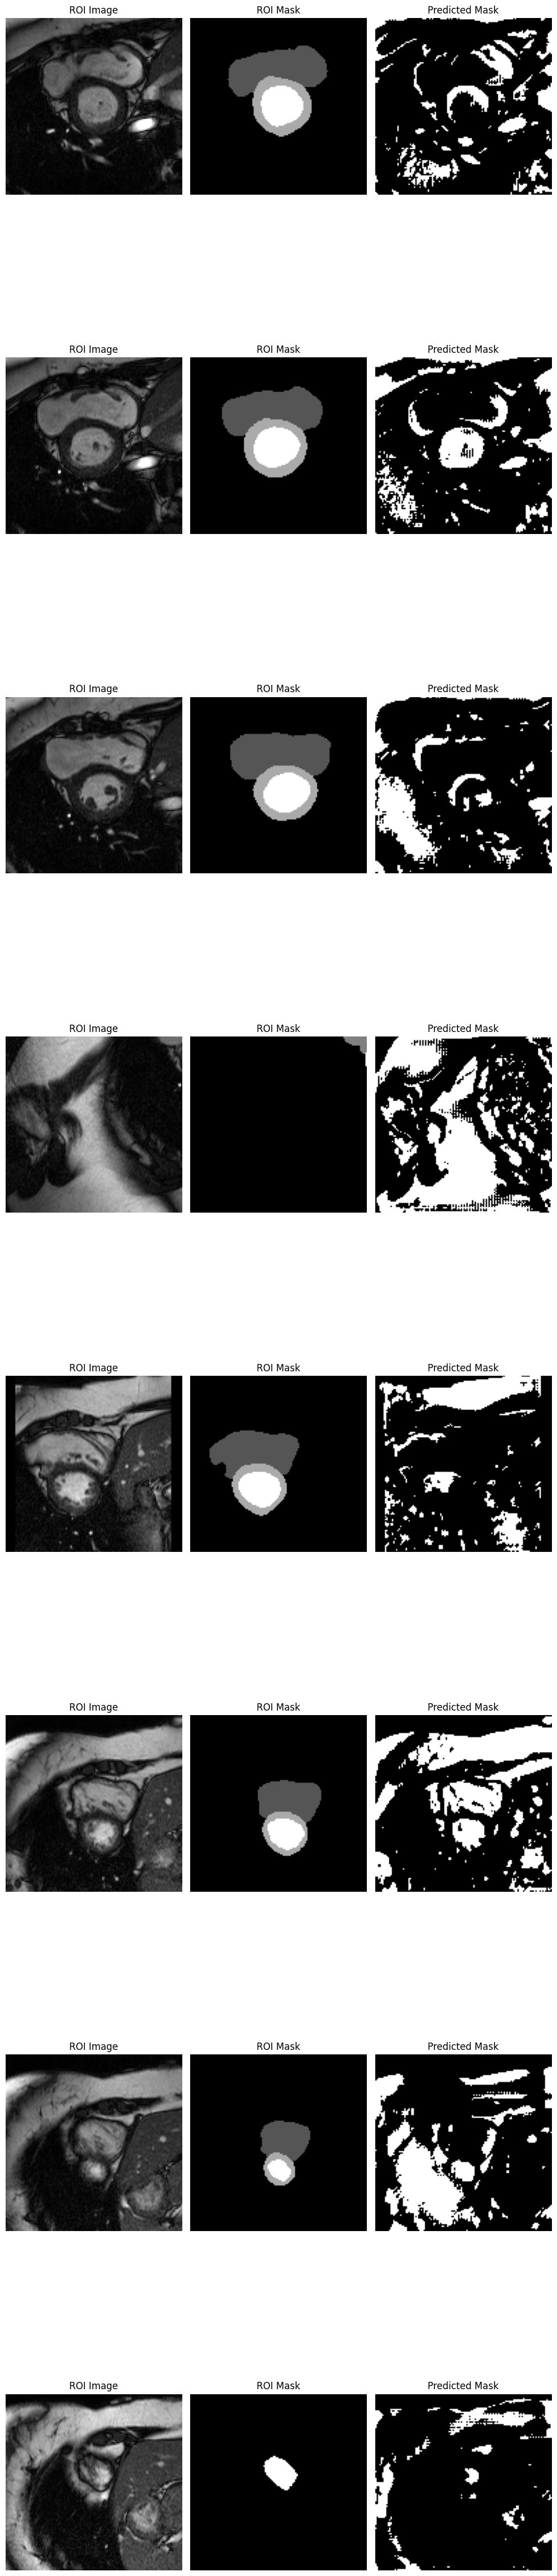

In [12]:
roi_image = torch.tensor(roi_image)
predicted_mask = densenet(roi_image.to(torch.float32).unsqueeze(1))
print(predicted_mask.shape)
fig, axs = plt.subplots(roi_image.shape[0], 3, figsize=(10, 50))
# Display the image and mask
for index in range(roi_image.shape[0]):
    axs[index, 0].imshow(roi_image[index], cmap='gray')
    axs[index, 1].imshow(roi_mask[index], cmap='gray')
    axs[index, 2].imshow(predicted_mask[index][3].detach().numpy()>0.2, cmap='gray')
    axs[index, 0].set_title('ROI Image')
    axs[index, 1].set_title('ROI Mask')
    axs[index, 2].set_title('Predicted Mask')
    axs[index, 0].axis('off')
    axs[index, 1].axis('off')
    axs[index, 2].axis('off')
plt.tight_layout()
plt.show()